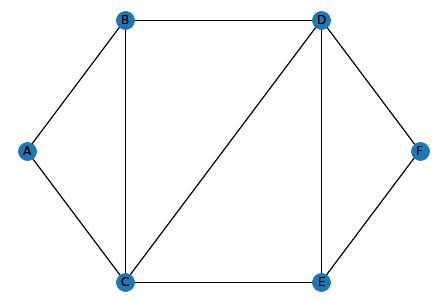

In [1]:
grafo = {'A': ['B', 'C'],
        'B': ['A', 'C', 'D'],
        'C': ['A', 'B', 'D', 'E'],
        'D': ['B', 'C', 'E', 'F'],
        'E': ['D', 'F'],
        'F': ['D', 'E']} # cria um dicionário, onde as chaves são os nós e os valores as conexões

import numpy as np # importa comandos numpý
import networkx as nx # importa comandos de grafos
import matplotlib.pyplot as plt # importa vizualização de grafos
%matplotlib inline

Graph = nx.Graph() # cria um grafo

for node in grafo: # passa por cada chave no dicionário
    Graph.add_nodes_from(node) # adiciona os nós a partir das chaves
    for edge in grafo[node]: # passa por cada valor no dicionário
        Graph.add_edge(node, edge) # adiciona as arestas a partir dos valores
        
pos = {'A': [0.00, 0.50], 'B': [0.25, 0.75],
      'C': [0.25, 0.25], 'D': [0.75, 0.75],
      'E': [0.75, 0.25], 'F': [1.00, 0.50]} # dá as coordenadas x e y de cada aresta

nx.draw(Graph, pos, with_labels=True) # desenha um grafo, com as coordenadas dadas
nx.draw_networkx(Graph, pos) # passa as coordenadas dadas para o grafo
plt.show() # mostra o grafo vizualmente

In [2]:
def bfs(graph, start): # cria uma função para busca em largura do grafo (BFS), com os parâmetros grafo (graph) e começo(start)
    queue = [start] # define a fila como o início (queue)
    queued = list() # cria uma lista vazia (queued)
    path = list() # define o caminha também como uma lista vazia (path)
    while queue: # repete toda vez que houver fila
        print('Queue is: %s' % queue) #retorna a fila
        vertex = queue.pop(0)  # retorna um elemento da lista e remove
        print('Processing %s' % vertex) # mostra o elemento removido
        for candidate in graph[vertex]: # passa por cada caminho no grafo
            if candidate not in queued:  # ocorre se o valor não está na fila
                queued.append(candidate) # adiciona o valor à fila
                queue.append(candidate) # adiciona o valor à fila
                path.append(vertex+'>'+candidate) # adiciona o valor removido e o valor atual ao caminho (path)
                print('Adding %s to the queue' % candidate) # retorna o valor adicionado a fila
    return path # retorna o cominho que passou
steps = bfs(grafo, 'A') # passa pelo grafo, iniciando por A
print('\nBFS:', steps) # mostra o grafo

Queue is: ['A']
Processing A
Adding B to the queue
Adding C to the queue
Queue is: ['B', 'C']
Processing B
Adding A to the queue
Adding D to the queue
Queue is: ['C', 'A', 'D']
Processing C
Adding E to the queue
Queue is: ['A', 'D', 'E']
Processing A
Queue is: ['D', 'E']
Processing D
Adding F to the queue
Queue is: ['E', 'F']
Processing E
Queue is: ['F']
Processing F

BFS: ['A>B', 'A>C', 'B>A', 'B>D', 'C>E', 'D>F']


In [5]:
def dfs(graph, start): # cria uma função para busca em profundidade do grafo (DFS), com os parâmetros grafo (graph) e começo(start)
    stack = [start] # define a pilha como igual ao início (stack)
    parents = {start: start} # define o nó pai como igual ao inicial
    path = list() # define o caminha também como uma lista vazia (path)
    while stack: # repete toda vez que houver pilha
        print('Stack is: %s' % stack) #retorna a pilha atual
        vertex = stack.pop(-1)  # retorna o último elemento da lista e o remove
        print('Processing %s' % vertex) # mostra o elemento removido
        for candidate in graph[vertex]: # passa por cada caminho no grafo
            if candidate not in parents:  # ocorre se o valor não está na sequência da pilha
                parents[candidate] = vertex # define o valor pai como igual ao removido
                stack.append(candidate) # adiciona o valor à pilha
                print('Adding %s to the stack' % candidate) # retorna o valor adicionado da fila
        path.append(parents[vertex]+'>'+vertex) # mostra o valor removido e o atual
    return path[1:] # retorna o cominho que passou
steps = dfs(grafo, 'A') # passa pelo grafo, iniciando por A
print('\nDFS:', steps) # mostra o grafo

Stack is: ['A']
Processing A
Adding B to the stack
Adding C to the stack
Stack is: ['B', 'C']
Processing C
Adding D to the stack
Adding E to the stack
Stack is: ['B', 'D', 'E']
Processing E
Adding F to the stack
Stack is: ['B', 'D', 'F']
Processing F
Stack is: ['B', 'D']
Processing D
Stack is: ['B']
Processing B

DFS: ['A>C', 'C>E', 'E>F', 'C>D', 'A>B']
